**Beginning Thought Process for Solution /  Pseudocode:**

To find the center and orientation of the object, I needed to identify the object in the image. To do this, I would use a color mask to filter out every color except the color of the object. In addition, I took a look at OpenCV's [cascade classfier](https://towardsdatascience.com/how-to-detect-objects-in-real-time-using-opencv-and-python-c1ba0c2c69c0) and the superior deep learning model [YOLOv5](https://medium.com/mlearning-ai/detecting-objects-with-yolov5-opencv-python-and-c-c7cf13d1483c). Using object detection by shape would be the ideal solution, but I would not do this for two main reasons. First, there is no pre-trained model for the pathmarker and it is not trivial to train your own model. Second, the color mask returned reasonably good results. 


**Research for How to Implement Solution**:

I found the [Color Filtering OpenCV Python Tutorial](https://pythonprogramming.net/color-filter-python-opencv-tutorial/) to be quite helpful in making a color mask. There was some difficulty in finding two HSV values to determine the bounds, but I found a [StackOverflow ](https://stackoverflow.com/questions/10948589/choosing-the-correct-upper-and-lower-hsv-boundaries-for-color-detection-withcv)conversation that led me in the right direction. I used this mask to find all the contours in the image. After that I used the largest contour as the object. To help with determining the real orientation of the object, I looked at [How to Determine the Orientation of an Object Using OpenCV. ](https://automaticaddison.com/how-to-determine-the-orientation-of-an-object-using-opencv/) Below is the contours found by OpenCV using the color mask.

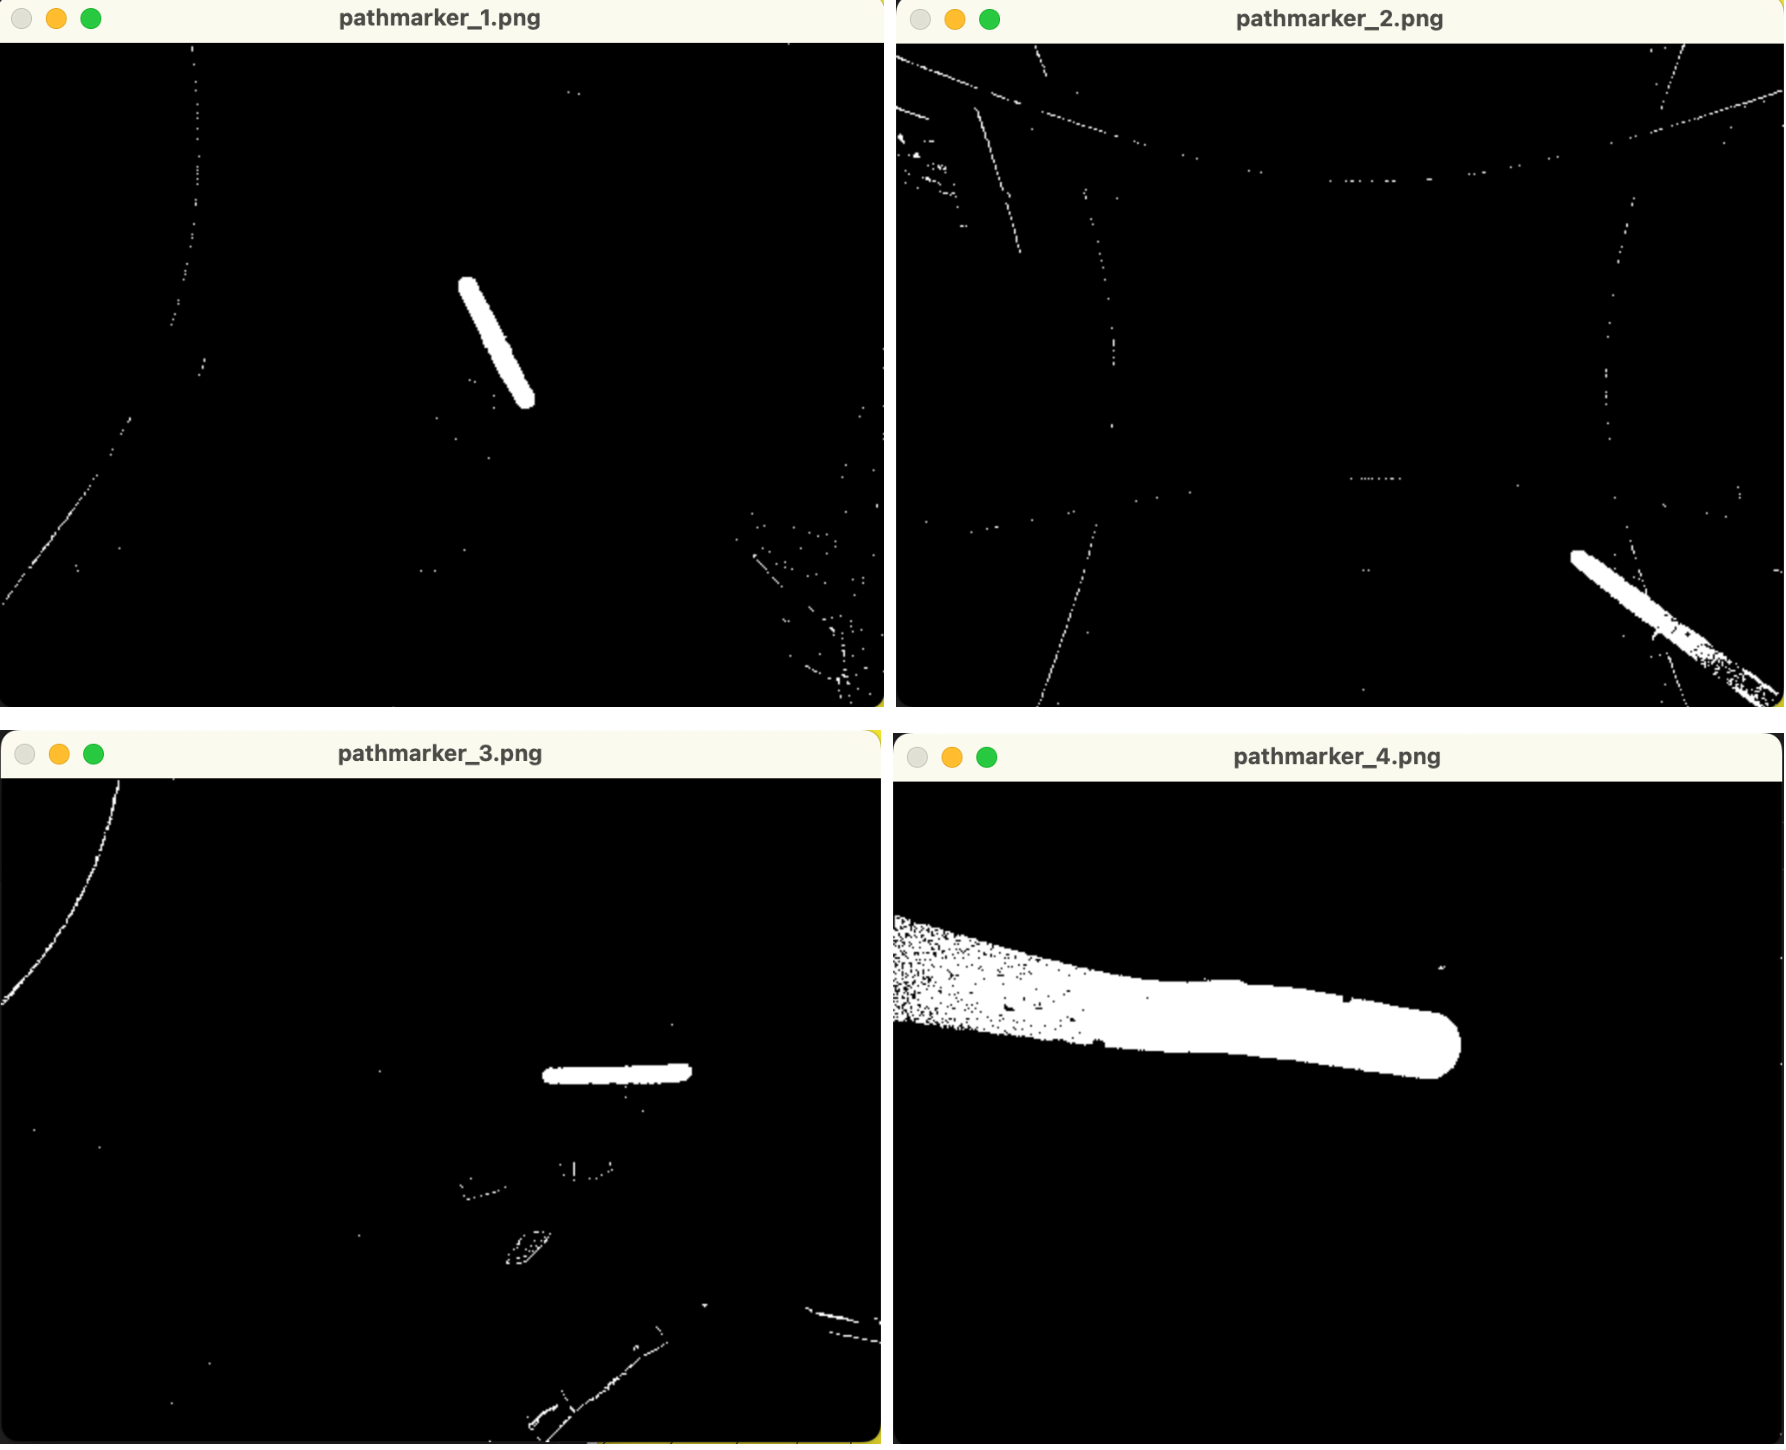

In [2]:
from IPython.display import Image
Image(filename="countours.png")

In [1]:
import cv2
import numpy as np
from typing import Tuple

def pathmarker_info(image_path: str) -> Tuple[int, int, int]:

    # read in image and convert to hsv colorspace
    img = cv2.imread(image_path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    ## removes all colors but colors in lower bound and upper bounds
    lower_bound = (2, 100, 20)
    upper_bound = (15, 255, 255)
    mask = cv2.inRange(hsv, lower_bound, upper_bound)

    # cv2.RETR_EXTERNAL: Gives only extreme outer contours / the ones that matter
    # cv2.CHAIN_APPROX_SIMPLE: compresses horizontal, vertical, and diagonal segments and leaves only their end points
    contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # find the largest contour with a matching color
    largest, idx = -1, -1
    for i, c in enumerate(contours):
        if cv2.contourArea(c) > largest:
            largest, idx = cv2.contourArea(c), i

    # center, width and height helps find correct angle
    (xPixelCenter, yPixelCenter), (width, height), angle = cv2.minAreaRect(contours[idx])

    if width > height:
        angle = angle - 90

    return (int(xPixelCenter), int(yPixelCenter), int(angle))


def run(): # Helps compare expected with calculated
    
    #Test cases
    expected_pathmarker_info = [
        (288, 172, -22), 
        (450, 337, -47), 
        (358, 171, 77),
        (164, 127, -73)]

    #Runs each case through algorithm
    for i in range(len(expected_pathmarker_info)):
        print (f'Expected output for pathmarker_{i+1}.png: {expected_pathmarker_info[i]}')
        result = pathmarker_info(f"images_q1/pathmarker_{i+1}.png")
        print (f'Calculated : {result}')


run()

Expected output for pathmarker_1.png: (288, 172, -22)
Calculated : (287, 172, -26)
Expected output for pathmarker_2.png: (450, 337, -47)
Calculated : (432, 328, -49)
Expected output for pathmarker_3.png: (358, 171, 77)
Calculated : (358, 171, 88)
Expected output for pathmarker_4.png: (164, 127, -73)
Calculated : (160, 135, -79)
